In [75]:
# importing Reqired libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import gradio as gr
import pickle
plt.rcParams['figure.figsize'] = [15,8]

In [2]:
# loading data
data=pd.read_csv('customer.csv')

In [3]:
# checking the head of the data
data.head()

,Cust_Number,Yearly_Income,Age,Cust_Spend_Score,Sex
0,CUSTID1,15000,18,44,0
1,CUSTID2,15000,18,79,0
2,CUSTID3,16000,23,8,1
3,CUSTID4,16000,25,79,1
4,CUSTID5,17000,32,41,1


In [4]:
# checking data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Cust_Number       200 non-null    object
 1   Yearly_Income     200 non-null    int64 
 2   Age               200 non-null    int64 
 3   Cust_Spend_Score  200 non-null    int64 
 4   Sex               200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# changing the datatype to object
data['Sex']=data['Sex'].astype('object')

In [6]:
# removing un-necessary columns
data.drop('Cust_Number',axis=1,inplace=True)
data.drop('Sex',axis=1,inplace=True)

In [7]:
# checking for null values
data.isnull().sum()

Yearly_Income       0
Age                 0
Cust_Spend_Score    0
Sex                 0
dtype: int64

C:\Users\ganes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Yearly_Income'>

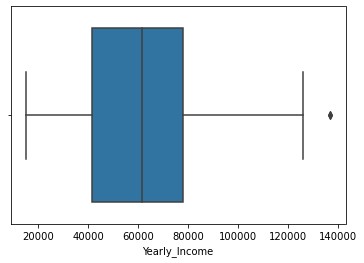

In [10]:
# checking for outliers
sns.boxplot(data['Yearly_Income'])

C:\Users\ganes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

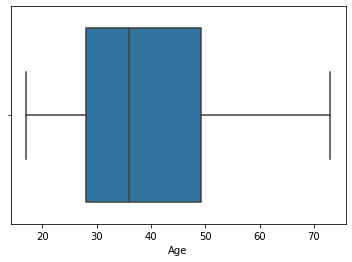

In [11]:
sns.boxplot(data['Age'])

C:\Users\ganes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cust_Spend_Score'>

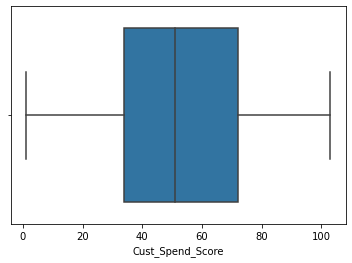

In [12]:
sns.boxplot(data['Cust_Spend_Score'])

In [13]:
# removing outliers
data['Yearly_Income'].quantile(0.75)

78000.0

In [14]:
data['Yearly_Income'].quantile(0.25)

41500.0

In [15]:
iqr=data['Yearly_Income'].quantile(0.75)-data['Yearly_Income'].quantile(0.25)

In [16]:
ul=data['Yearly_Income'].quantile(0.75)+(1.5*iqr)

In [17]:
ul

132750.0

In [22]:
# creating new dataframe without outliers
new_data=data[data['Yearly_Income']<=ul]

In [24]:
# checking new data's head
new_data.head()

,Yearly_Income,Age,Cust_Spend_Score,Sex
0,15000,18,44,0
1,15000,18,79,0
2,16000,23,8,1
3,16000,25,79,1
4,17000,32,41,1
...,...,...,...,...
193,113000,35,94,1
194,120000,48,17,1
195,120000,36,79,1
196,126000,46,32,1


In [28]:
# creating instance for standard scaler
ss=StandardScaler()

In [29]:
# Scaling the data
scaled_data=ss.fit_transform(new_data)

In [31]:
# Checking for best number of clusters
wcss=[]
for i in range(1,21):
    kmeans=KMeans(n_clusters=i,random_state=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

C:\Users\ganes\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ganes\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ganes\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ganes\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

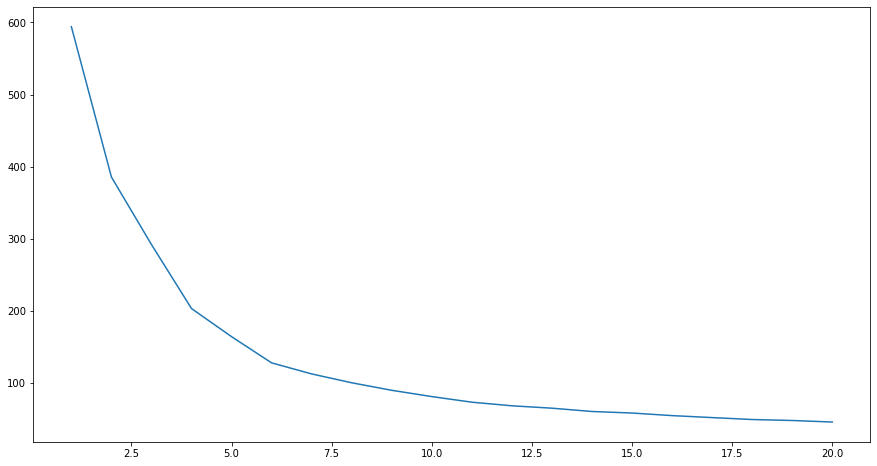

In [35]:
# plotting the graph to select best number of clusters
plt.plot(range(1,21),wcss)

In [37]:
# creating model with 5 clusters
new_cluster=KMeans(n_clusters=5,random_state=10)

In [38]:
# training the model
new_cluster.fit(new_data)

C:\Users\ganes\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=10)

In [43]:
# testing the model
new_cluster.predict(new_data)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [44]:
# adding predicted cluster's column to existing data
new_data['clusters']=new_cluster.predict(new_data)

C:\Users\ganes\AppData\Local\Temp/ipykernel_26692/1933426784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['clusters']=new_cluster.predict(new_data)


In [46]:
# checking for head after adding clusters column
new_data.head()

,Yearly_Income,Age,Cust_Spend_Score,clusters
0,15000,18,44,3
1,15000,18,79,3
2,16000,23,8,3
3,16000,25,79,3
4,17000,32,41,3


In [47]:
# getting the count if each clusters values
new_data['clusters'].value_counts()

0    54
4    50
1    42
3    32
2    20
Name: clusters, dtype: int64

# cluster 0

In [50]:
# checking for length
len(new_data[new_data['clusters']==0])

54

In [51]:
# decribing the cluster
new_data[new_data['clusters']==0].describe()

,Yearly_Income,Age,Cust_Spend_Score,clusters
count,54.00000,54.000000,54.000000,54.0
mean,78370.37037,36.203704,50.444444,0.0
std,5796.21313,9.441737,34.406925,0.0
min,70000.00000,21.000000,1.000000,0.0
25%,73250.00000,28.250000,15.000000,0.0
50%,78000.00000,35.500000,54.000000,0.0
75%,84000.00000,42.000000,79.500000,0.0
max,88000.00000,59.000000,102.000000,0.0


# cluster 1

In [55]:
# checking for length
len(new_data[new_data['clusters']==1])

42

In [56]:
# decribing the cluster
new_data[new_data['clusters']==1].describe()

,Yearly_Income,Age,Cust_Spend_Score,clusters
count,42.000000,42.000000,42.000000,42.0
mean,42238.095238,43.833333,51.119048,1.0
std,5299.836738,16.931594,17.690017,0.0
min,33000.000000,17.000000,2.000000,1.0
25%,39000.000000,30.000000,43.500000,1.0
50%,43000.000000,47.000000,51.000000,1.0
75%,47000.000000,55.000000,60.000000,1.0
max,50000.000000,73.000000,94.000000,1.0


# cluster 2

In [57]:
# checking for length
len(new_data[new_data['clusters']==2])

20

In [58]:
# decribing the cluster
new_data[new_data['clusters']==2].describe()

,Yearly_Income,Age,Cust_Spend_Score,clusters
count,20.000000,20.000000,20.000000,20.0
mean,105300.000000,37.350000,53.800000,2.0
std,10493.607076,8.542618,32.368926,0.0
min,93000.000000,26.000000,12.000000,2.0
25%,98000.000000,31.750000,22.750000,2.0
50%,102000.000000,35.500000,51.500000,2.0
75%,113000.000000,41.750000,87.000000,2.0
max,126000.000000,58.000000,95.000000,2.0


# cluster 3

In [59]:
# checking for length
len(new_data[new_data['clusters']==3])

32

In [60]:
# decribing the cluster
new_data[new_data['clusters']==3].describe()

,Yearly_Income,Age,Cust_Spend_Score,clusters
count,32.000000,32.000000,32.000000,32.0
mean,22000.000000,34.781250,51.531250,3.0
std,4765.467177,14.227947,32.921201,0.0
min,15000.000000,18.000000,1.000000,3.0
25%,18750.000000,22.750000,19.000000,3.0
50%,20500.000000,33.000000,52.500000,3.0
75%,25750.000000,42.500000,79.000000,3.0
max,30000.000000,69.000000,103.000000,3.0


# cluster 4 

In [61]:
# checking for length
len(new_data[new_data['clusters']==4])

50

In [62]:
# decribing the cluster
new_data[new_data['clusters']==4].describe()

,Yearly_Income,Age,Cust_Spend_Score,clusters
count,50.000000,50.000000,50.0000,50.0
mean,60440.000000,42.060000,51.4000,4.0
std,4563.206892,16.095899,8.3666,0.0
min,54000.000000,18.000000,39.0000,4.0
25%,57000.000000,28.250000,47.0000,4.0
50%,61000.000000,42.000000,50.5000,4.0
75%,63000.000000,52.750000,55.7500,4.0
max,69000.000000,70.000000,91.0000,4.0


In [ ]:
# saving the model
pickle.dump(new_cluster,open('customer_cluster.pkl','wb'))